In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
dataframe_train=pd.read_csv("train.csv")
dataframe_train

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [5]:
dataframe_test=pd.read_csv("test.csv")
dataframe_test

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000
...,...,...,...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2,BHK,856.555505,1,1,"Thane West,Maharashtra",19.180000,72.963330
68716,Dealer,0,1,3,BHK,2304.147465,1,1,"Sector-66A Mohali,Mohali",30.661104,76.746082
68717,Dealer,1,1,1,BHK,33362.792750,0,0,"Balkum,Maharashtra",19.222101,72.988231
68718,Dealer,0,0,2,BHK,1173.708920,1,1,"Hadapsar,Pune",18.496670,73.941670


In [6]:
df_train=dataframe_train.drop((["UNDER_CONSTRUCTION", "RERA", "BHK_NO.","POSTED_BY","READY_TO_MOVE","RESALE","BHK_OR_RK","ADDRESS"]),axis=1)
df_train

,SQUARE_FT,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,1300.236407,12.969910,77.597960,55.0
1,1275.000000,12.274538,76.644605,51.0
2,933.159722,12.778033,77.632191,43.0
3,929.921143,28.642300,77.344500,62.5
4,999.009247,22.592200,88.484911,60.5
...,...,...,...,...
29446,2500.000000,27.140626,78.043277,45.0
29447,769.230769,39.945409,-86.150721,16.0
29448,1022.641509,26.928785,75.828002,27.1
29449,927.079009,12.900150,80.227910,67.0


Text(0, 0.5, 'TARGET(PRICE_IN_LACS)')

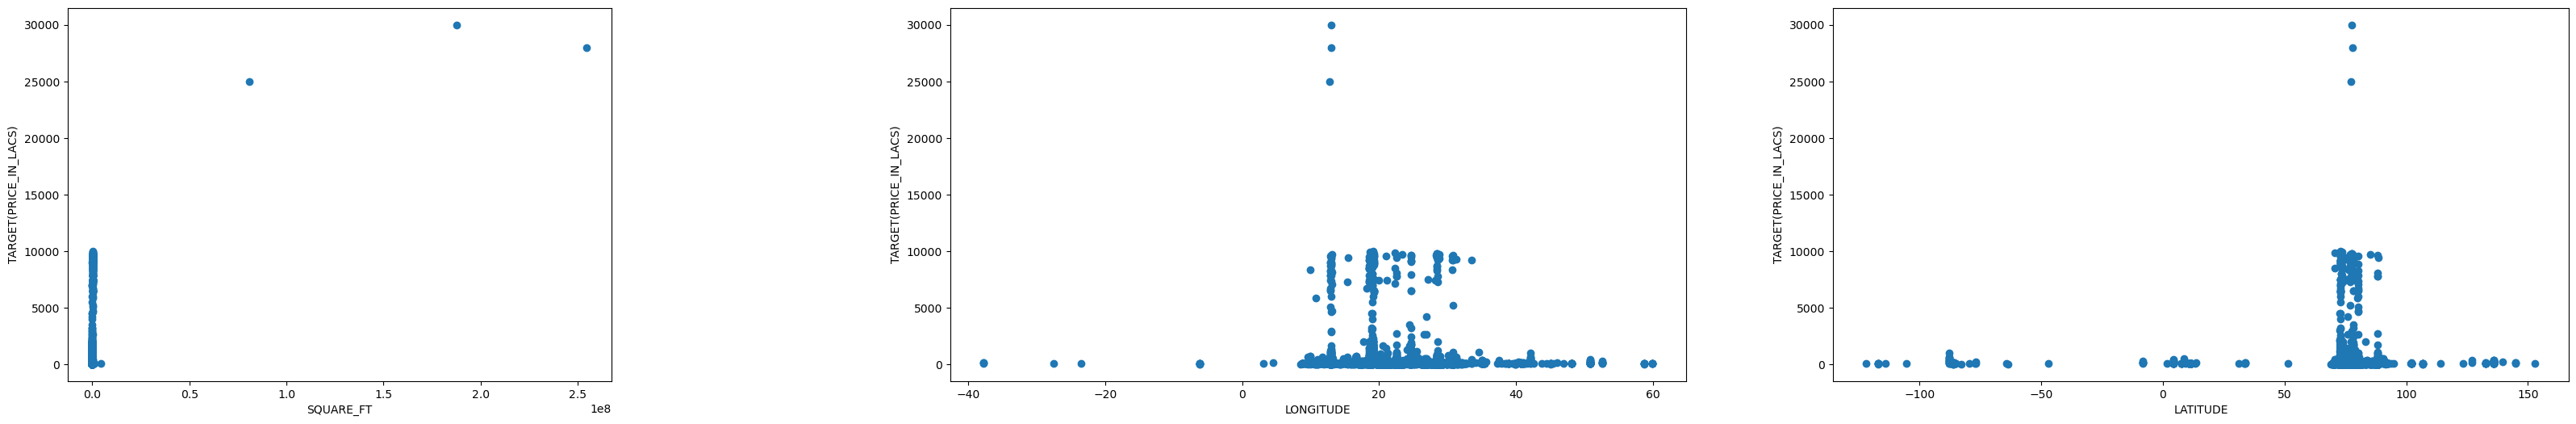

In [8]:
plt.figure(figsize=(40,6))
plt.subplot(141)
plt.scatter(df_train['SQUARE_FT'], df_train['TARGET(PRICE_IN_LACS)'])
plt.xlabel('SQUARE_FT')
plt.ylabel('TARGET(PRICE_IN_LACS)')
plt.subplot(132)
plt.scatter(df_train['LONGITUDE'], df_train['TARGET(PRICE_IN_LACS)'])
plt.xlabel('LONGITUDE')
plt.ylabel('TARGET(PRICE_IN_LACS)')
plt.subplot(133)
plt.scatter(df_train['LATITUDE'], df_train['TARGET(PRICE_IN_LACS)'])
plt.xlabel('LATITUDE')
plt.ylabel('TARGET(PRICE_IN_LACS)')

In [9]:
df_test=dataframe_test.drop((["UNDER_CONSTRUCTION", "RERA", "BHK_NO.","POSTED_BY","READY_TO_MOVE","RESALE","BHK_OR_RK","ADDRESS"]),axis=1)
df_test

,SQUARE_FT,LONGITUDE,LATITUDE
0,545.171340,21.262000,73.047700
1,800.000000,18.966114,73.148278
2,1257.096513,22.592200,88.484911
3,1400.329489,26.988300,75.584600
4,430.477830,22.700000,72.870000
...,...,...,...
68715,856.555505,19.180000,72.963330
68716,2304.147465,30.661104,76.746082
68717,33362.792750,19.222101,72.988231
68718,1173.708920,18.496670,73.941670


In [12]:
df_train_values=df_train.values
X_train=df_train_values[:,0:3]
y_train=df_train_values[:,3]
X_train.shape,y_train.shape

((29451, 3), (29451,))

In [13]:

y_train=y_train.reshape(-1,1)
X_train.shape,y_train.shape
df_test_values=df_test.values
X_test=df_test_values[:,0:3]
X_test.shape


(68720, 3)

In [14]:
lin_reg_model=LinearRegression()
lin_reg_model.fit(X_train,y_train)

LinearRegression()

In [15]:
y_prediction=lin_reg_model.predict(X_train)
y_prediction

array([[165.27640901],
       [168.75673551],
       [165.77701834],
       ...,
       [124.11445148],
       [161.81812806],
       [124.37895431]])

In [17]:
rmse=np.sqrt(mean_squared_error(y_train,y_prediction))
rmse
r2_score(y_train,y_prediction)

0.16331195702385093

In [18]:
decision_tree_model= DecisionTreeRegressor()
decision_tree_model.fit(X_train,y_train)
y_prediction_tree=decision_tree_model.predict(X_train)

y_prediction_tree_test=decision_tree_model.predict(X_test)
y_prediction_tree_test

print("RMSE:",np.sqrt(mean_squared_error(y_train,y_prediction_tree)))
print("R_square:",r2_score(y_train,y_prediction_tree))

RMSE: 8.715009786368816
R_square: 0.9998239737309261


In [19]:
dataframe_train['predicted_price_decision_tree_regression']=y_prediction_tree
dataframe_train

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),predicted_price_decision_tree_regression
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,67.0


In [22]:
dataframe_test['predicted_price_decision_regression']=y_prediction_tree_test
dataframe_test

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,predicted_price_decision_regression
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700,13.5
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278,81.0
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911,72.0
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600,35.0
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2,BHK,856.555505,1,1,"Thane West,Maharashtra",19.180000,72.963330,69.0
68716,Dealer,0,1,3,BHK,2304.147465,1,1,"Sector-66A Mohali,Mohali",30.661104,76.746082,120.0
68717,Dealer,1,1,1,BHK,33362.792750,0,0,"Balkum,Maharashtra",19.222101,72.988231,8610.0
68718,Dealer,0,0,2,BHK,1173.708920,1,1,"Hadapsar,Pune",18.496670,73.941670,84.4
